## FLC Simulation for Line Follower Robot

c:\Users\fahri\miniconda3\envs\fuzzy\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


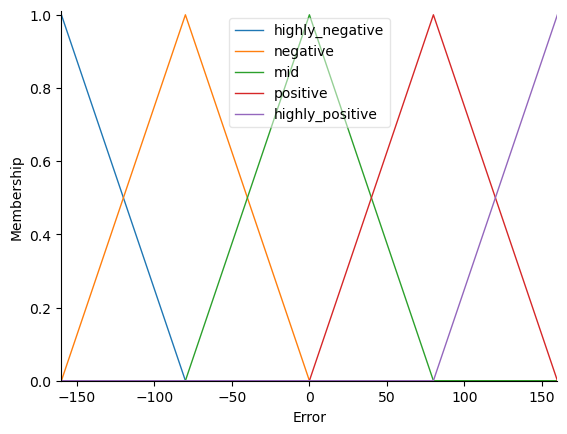

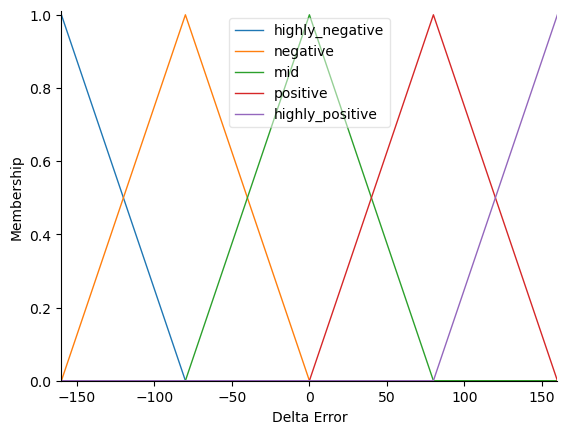

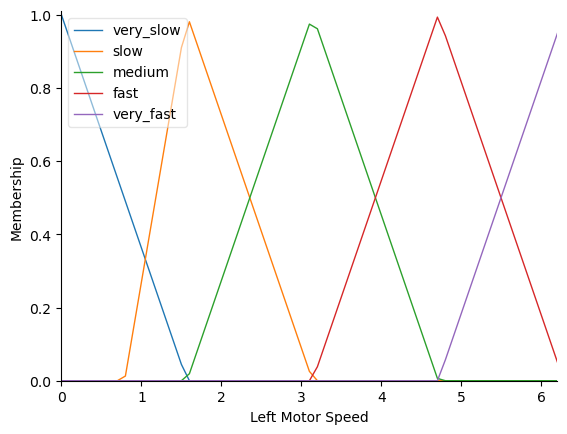

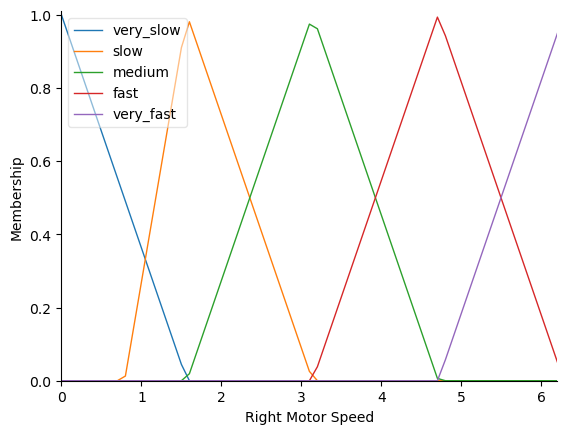

In [8]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctl

# Input
error = ctl.Antecedent(np.arange(-210, 211, 1), 'Error')
delta_error = ctl.Antecedent(np.arange(-210, 211, 1), 'Delta Error')

# Output
left_motor_speed = ctl.Consequent(np.arange(0, 6.29, 0.1), 'Left Motor Speed')
right_motor_speed = ctl.Consequent(np.arange(0, 6.29, 0.1), 'Right Motor Speed')

# Membership functions for error
error['highly_negative'] = fuzz.trimf(error.universe, [-210, -210, -105])
error['negative'] = fuzz.trimf(error.universe, [-210, -105, 0])
error['mid'] = fuzz.trimf(error.universe, [-105, 0, 105])
error['positive'] = fuzz.trimf(error.universe, [0, 105, 210])
error['highly_positive'] = fuzz.trimf(error.universe, [105, 210, 210])

# Membership functions for delta_error
delta_error['highly_negative'] = fuzz.trimf(delta_error.universe, [-210, -210, -105])
delta_error['negative'] = fuzz.trimf(delta_error.universe, [-210, -105, 0])
delta_error['mid'] = fuzz.trimf(delta_error.universe, [-105, 0, 105])
delta_error['positive'] = fuzz.trimf(delta_error.universe, [0, 105, 210])
delta_error['highly_positive'] = fuzz.trimf(delta_error.universe, [105, 210, 210])

# Membership functions for motor speed
left_motor_speed['very_slow'] = fuzz.trimf(left_motor_speed.universe, [0, 0, 1.57])
left_motor_speed['slow'] = fuzz.trimf(left_motor_speed.universe, [0.79, 1.57, 3.14])
left_motor_speed['medium'] = fuzz.trimf(left_motor_speed.universe, [1.57, 3.14, 4.71])
left_motor_speed['fast'] = fuzz.trimf(left_motor_speed.universe, [3.14, 4.71, 6.28])
left_motor_speed['very_fast'] = fuzz.trimf(left_motor_speed.universe, [4.71, 6.28, 6.28])

right_motor_speed['very_slow'] = fuzz.trimf(right_motor_speed.universe, [0, 0, 1.57])
right_motor_speed['slow'] = fuzz.trimf(right_motor_speed.universe, [0.79, 1.57, 3.14])
right_motor_speed['medium'] = fuzz.trimf(right_motor_speed.universe, [1.57, 3.14, 4.71])
right_motor_speed['fast'] = fuzz.trimf(right_motor_speed.universe, [3.14, 4.71, 6.28])
right_motor_speed['very_fast'] = fuzz.trimf(right_motor_speed.universe, [4.71, 6.28, 6.28])


error.view()
delta_error.view()
left_motor_speed.view()
right_motor_speed.view()

LMS Output: 2.79
RMS Output: 2.89


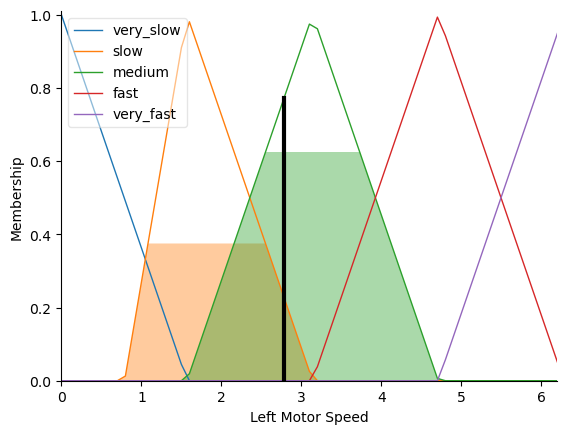

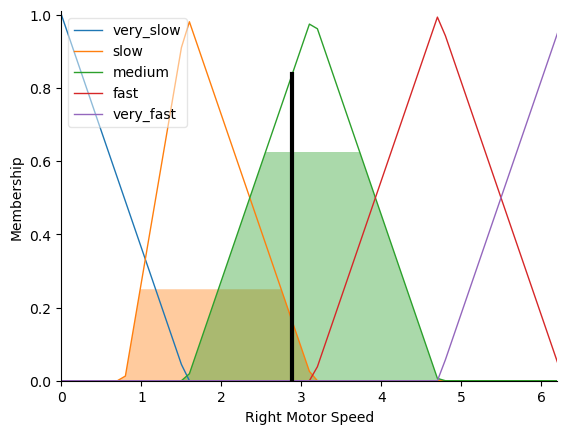

In [10]:
# Define fuzzy rules
rules = [
    ctl.Rule(error['highly_negative'] & delta_error['highly_negative'], (left_motor_speed['very_fast'], right_motor_speed['very_slow'])),
    ctl.Rule(error['highly_negative'] & delta_error['negative'], (left_motor_speed['fast'], right_motor_speed['slow'])),
    ctl.Rule(error['highly_negative'] & delta_error['mid'], (left_motor_speed['medium'], right_motor_speed['slow'])),
    ctl.Rule(error['highly_negative'] & delta_error['positive'], (left_motor_speed['medium'], right_motor_speed['medium'])),
    ctl.Rule(error['highly_negative'] & delta_error['highly_positive'], (left_motor_speed['slow'], right_motor_speed['fast'])),

    ctl.Rule(error['negative'] & delta_error['highly_negative'], (left_motor_speed['fast'], right_motor_speed['very_slow'])),
    ctl.Rule(error['negative'] & delta_error['negative'], (left_motor_speed['medium'], right_motor_speed['slow'])),
    ctl.Rule(error['negative'] & delta_error['mid'], (left_motor_speed['medium'], right_motor_speed['medium'])),
    ctl.Rule(error['negative'] & delta_error['positive'], (left_motor_speed['slow'], right_motor_speed['medium'])),
    ctl.Rule(error['negative'] & delta_error['highly_positive'], (left_motor_speed['slow'], right_motor_speed['fast'])),

    ctl.Rule(error['mid'] & delta_error['highly_negative'], (left_motor_speed['medium'], right_motor_speed['fast'])),
    ctl.Rule(error['mid'] & delta_error['negative'], (left_motor_speed['medium'], right_motor_speed['medium'])),
    ctl.Rule(error['mid'] & delta_error['mid'], (left_motor_speed['medium'], right_motor_speed['medium'])),
    ctl.Rule(error['mid'] & delta_error['positive'], (left_motor_speed['medium'], right_motor_speed['medium'])),
    ctl.Rule(error['mid'] & delta_error['highly_positive'], (left_motor_speed['medium'], right_motor_speed['fast'])),

    ctl.Rule(error['positive'] & delta_error['highly_negative'], (left_motor_speed['slow'], right_motor_speed['medium'])),
    ctl.Rule(error['positive'] & delta_error['negative'], (left_motor_speed['slow'], right_motor_speed['medium'])),
    ctl.Rule(error['positive'] & delta_error['mid'], (left_motor_speed['medium'], right_motor_speed['medium'])),
    ctl.Rule(error['positive'] & delta_error['positive'], (left_motor_speed['slow'], right_motor_speed['fast'])),
    ctl.Rule(error['positive'] & delta_error['highly_positive'], (left_motor_speed['very_slow'], right_motor_speed['very_fast'])),

    ctl.Rule(error['highly_positive'] & delta_error['highly_negative'], (left_motor_speed['slow'], right_motor_speed['fast'])),
    ctl.Rule(error['highly_positive'] & delta_error['negative'], (left_motor_speed['slow'], right_motor_speed['medium'])),
    ctl.Rule(error['highly_positive'] & delta_error['mid'], (left_motor_speed['medium'], right_motor_speed['medium'])),
    ctl.Rule(error['highly_positive'] & delta_error['positive'], (left_motor_speed['slow'], right_motor_speed['fast'])),
    ctl.Rule(error['highly_positive'] & delta_error['highly_positive'], (left_motor_speed['very_slow'], right_motor_speed['very_fast']))
]
# Control system
left_motor_speed_ctl = ctl.ControlSystem(rules)
right_motor_speed_ctl = ctl.ControlSystem(rules)

# Simulation
left_speed_sim = ctl.ControlSystemSimulation(left_motor_speed_ctl)
right_speed_sim = ctl.ControlSystemSimulation(right_motor_speed_ctl)

# Input values
input_error = -100
input_delta_error = 30

left_speed_sim.input['Error'] = input_error
left_speed_sim.input['Delta Error'] = input_delta_error

right_speed_sim.input['Error'] = input_error
right_speed_sim.input['Delta Error'] = input_delta_error

# Compute the outputs
left_speed_sim.compute()
right_speed_sim.compute()

print(f"LMS Output: {left_speed_sim.output['Left Motor Speed']:.2f}")
print(f"RMS Output: {right_speed_sim.output['Right Motor Speed']:.2f}")

# Visualize the output membership functions
left_motor_speed.view(sim=left_speed_sim)
right_motor_speed.view(sim=right_speed_sim)